In [2]:
import os
import random
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

Max IoU: 15.94%
Predicted box 1 area: 31556 pixels
Ground truth box area: 113295 pixels
Max IoU: 73.71%
Predicted box 2 area: 31556 pixels
Ground truth box area: 113295 pixels
Max IoU: 27.30%
Predicted box 3 area: 31556 pixels
Ground truth box area: 113295 pixels


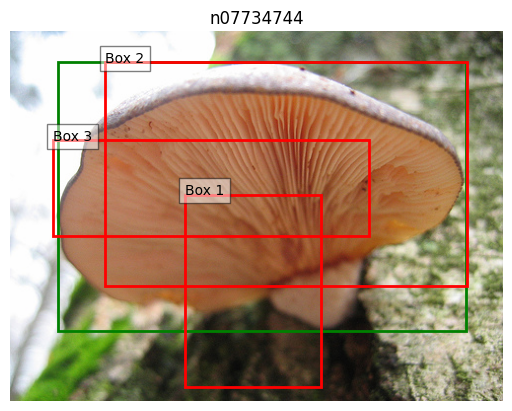

Max IoU: 32.06%
Predicted box 1 area: 51408 pixels
Ground truth box area: 86779 pixels
Max IoU: 51.88%
Predicted box 2 area: 51408 pixels
Ground truth box area: 86779 pixels
Max IoU: 56.13%
Predicted box 3 area: 51408 pixels
Ground truth box area: 86779 pixels


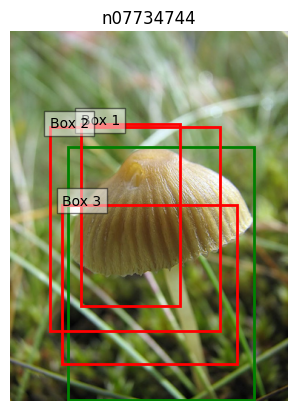

Max IoU: 25.72%
Predicted box 1 area: 72160 pixels
Ground truth box area: 21971 pixels
Max IoU: 25.16%
Predicted box 2 area: 72160 pixels
Ground truth box area: 21971 pixels


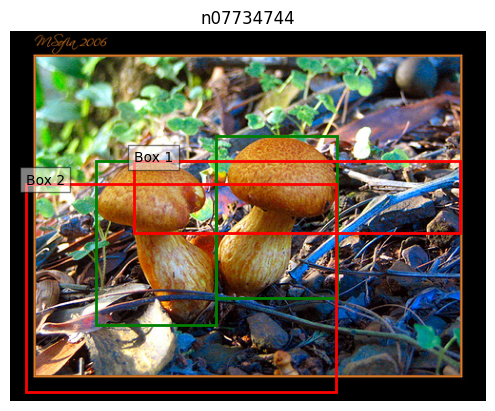

Max IoU: 40.89%
Predicted box 1 area: 93432 pixels
Ground truth box area: 95410 pixels


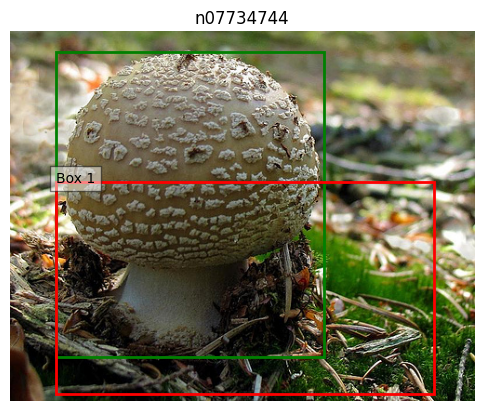

Max IoU: 33.73%
Predicted box 1 area: 52622 pixels
Ground truth box area: 27142 pixels


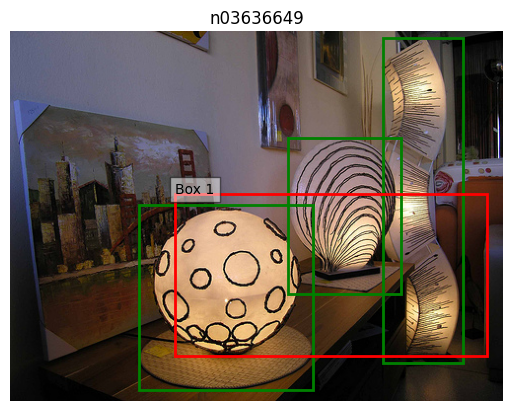

Max IoU: 4.64%
Predicted box 1 area: 66308 pixels
Ground truth box area: 3080 pixels


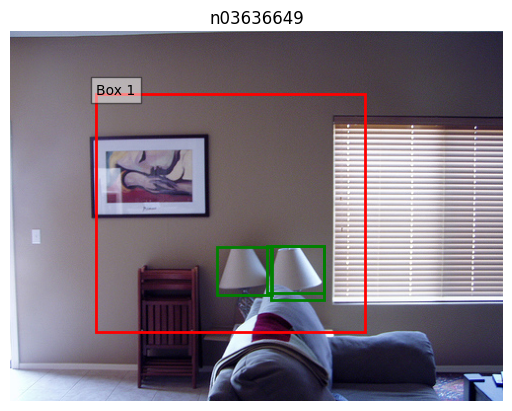

Max IoU: 7.90%
Predicted box 1 area: 26572 pixels
Ground truth box area: 7150 pixels
Max IoU: 13.11%
Predicted box 2 area: 26572 pixels
Ground truth box area: 7150 pixels
Max IoU: 22.71%
Predicted box 3 area: 26572 pixels
Ground truth box area: 7150 pixels


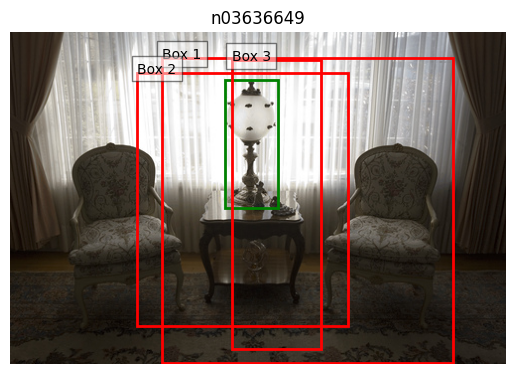

Max IoU: 0.00%
Predicted box 1 area: 28137 pixels
Ground truth box area: 49506 pixels
Max IoU: 18.72%
Predicted box 2 area: 28137 pixels
Ground truth box area: 49506 pixels
Max IoU: 17.60%
Predicted box 3 area: 28137 pixels
Ground truth box area: 49506 pixels


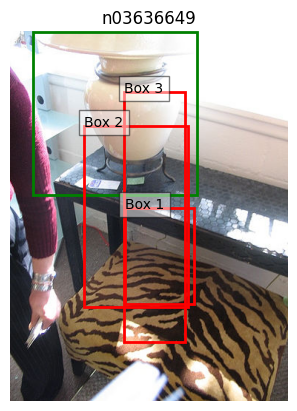

Max IoU: 6.43%
Predicted box 1 area: 46110 pixels
Ground truth box area: 3726 pixels
Max IoU: 0.00%
Predicted box 2 area: 46110 pixels
Ground truth box area: 3726 pixels
Max IoU: 8.08%
Predicted box 3 area: 46110 pixels
Ground truth box area: 3726 pixels


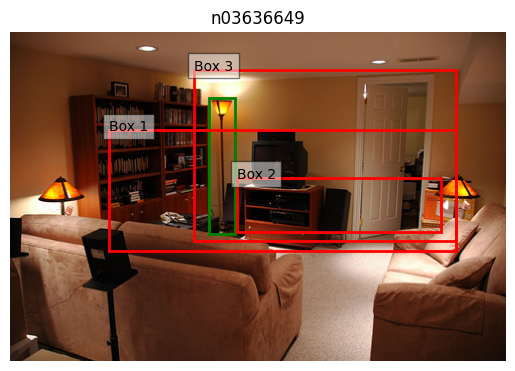

Max IoU: 0.00%
Predicted box 1 area: 55539 pixels
Ground truth box area: 2451 pixels


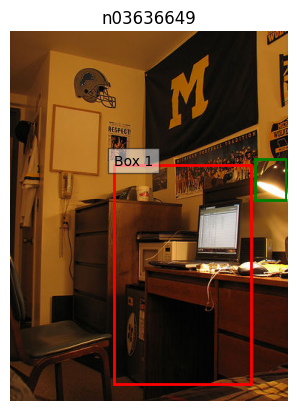

Max IoU: 0.00%
Predicted box 1 area: 74240 pixels
Ground truth box area: 13824 pixels
Max IoU: 18.62%
Predicted box 2 area: 74240 pixels
Ground truth box area: 13824 pixels


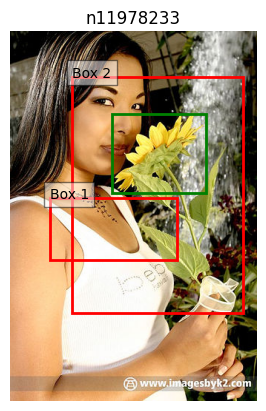

Max IoU: 24.06%
Predicted box 1 area: 74000 pixels
Ground truth box area: 630 pixels
Max IoU: 16.97%
Predicted box 2 area: 74000 pixels
Ground truth box area: 630 pixels
Max IoU: 35.86%
Predicted box 3 area: 74000 pixels
Ground truth box area: 630 pixels


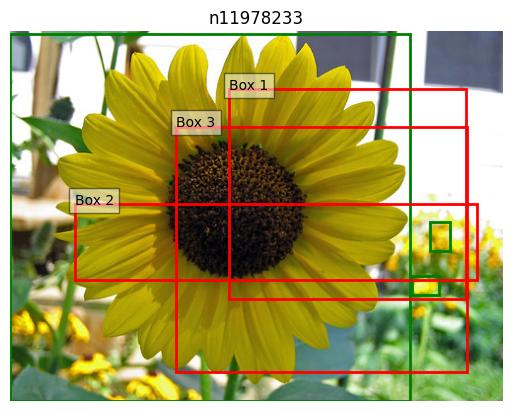

In [6]:
# Define image and annotation folders
image_folder = r"D:\Images"
annot_folder = r"D:\Annotations"

# Function to calculate IoU (Intersection over Union)
def calculate_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersect_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    area_box1 = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    area_box2 = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union_area = area_box1 + area_box2 - intersect_area

    iou = (intersect_area / union_area) * 100 if union_area > 0 else 0.0
    return iou

# Function to plot annotations and calculate IoU
def plot_annotations(image_folder, anno_folder, category_id):
    image_files = os.listdir(image_folder)
    random_images = random.sample(image_files, min(10, len(image_files)))

    for image in random_images:
        image_path = os.path.join(image_folder, image)
        img = plt.imread(image_path)

        xml_file = os.path.splitext(image)[0] + ".xml"
        xml_path = os.path.join(anno_folder, xml_file)

        if os.path.isfile(xml_path):
            tree = ET.parse(xml_path)
            root = tree.getroot()

            fig, ax = plt.subplots(1)
            ax.imshow(img)

            gt_boxes = []
            for obj in root.findall('object'):
                xmin = int(obj.find('bndbox').find('xmin').text)
                ymin = int(obj.find('bndbox').find('ymin').text)
                xmax = int(obj.find('bndbox').find('xmax').text)
                ymax = int(obj.find('bndbox').find('ymax').text)
                gt_boxes.append([xmin, ymin, xmax, ymax])
                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='g', facecolor='none', fill=False)
                ax.add_patch(rect)
                gt_area = (xmax - xmin + 1) * (ymax - ymin + 1)

            pred_boxes = []
            for idx in range(random.randint(1, 3)): 
                xmin = random.randint(0, img.shape[1] // 2)
                ymin = random.randint(0, img.shape[0] // 2)
                xmax = random.randint(img.shape[1] // 2, img.shape[1])
                ymax = random.randint(img.shape[0] // 2, img.shape[0])
                pred_boxes.append([xmin, ymin, xmax, ymax])
                rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none', fill=False)
                ax.add_patch(rect)
                ax.text(xmin, ymin, f'Box {idx+1}', bbox=dict(facecolor='white', alpha=0.5))
                pred_area = (xmax - xmin + 1) * (ymax - ymin + 1)

            for i, pred_box in enumerate(pred_boxes):
                iou_percentages = [calculate_iou(pred_box, gt_box) for gt_box in gt_boxes]
                max_iou_percentage = max(iou_percentages)
                #quality = "Good" if max_iou_percentage > 50 else "Poor"  
                print(f"Max IoU: {max_iou_percentage:.2f}%")
                print(f"Predicted box {i+1} area: {pred_area} pixels")
                print(f"Ground truth box area: {gt_area} pixels")

            ax.set_title(category_id)  
            ax.axis('off')
            plt.show()

# Plot annotations for each category
categories = ["n07734744", "n03636649", "n11978233"]
for category in categories:
    plot_annotations(os.path.join(image_folder, category), os.path.join(annot_folder, category), category) 
